Question 01. HealthCare Classification Dataset

In [1]:
import pandas as pd

df = pd.read_csv("/content/Healthcare_Classification_Dataset.csv")

In [2]:
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Billing Amount,Date of Admission,Doctor,Hospital,Insurance Provider,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Tiffany Ramirez,81.0,Female,O-,Diabetes,37490.98336,17-11-2022,Patrick Parker,Wallace-Hamilton,Medicare,146,Elective,01-12-2022,Aspirin,Normal
1,2,Ruben Burns,35.0,Male,O+,Asthma,47304.06485,01-06-2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,404,Emergency,15-06-2023,Lipitor,Normal
2,3,Chad Byrd,61.0,Male,B-,Obesity,36874.89700,09-01-2019,Paul Baker,Walton LLC,Medicare,292,Emergency,08-02-2019,Lipitor,NaN
3,4,Antonio Frederick,49.0,Male,B-,Asthma,23303.32209,02-05-2020,Brian Chandler,Garcia Ltd,Medicare,480,Urgent,03-05-2020,Penicillin,Abnormal
4,5,Mrs. Brandy Flowers,51.0,Male,O-,Arthritis,NaN,09-07-2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,477,Urgent,02-08-2021,Paracetamol,Normal


In [3]:
df1 = df.dropna()

In [4]:
df = df.drop_duplicates(subset=['ID'])

In [5]:
import numpy as np
# Assuming 'df' is your DataFrame and contains numeric columns you want to process.
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

In [6]:
df.isnull().sum()

,0
ID,0
Name,1
Age,0
Gender,1
Blood Type,1
Medical Condition,2
Billing Amount,0
Date of Admission,1
Doctor,0
Hospital,1


In [7]:
# Assuming 'df' is your DataFrame
for column in df.select_dtypes(include=np.number).columns:  # Select only numeric columns
    df[column] = df[column].fillna(df[column].mean())

In [8]:
# Create a list of columns to fill NA values
columns_to_fill = [] # Example columns, replace with your actual columns

# Fill NA values in specified columns with the mean of each column
for col in columns_to_fill:
  # Calculate the mode of the column
  mode_value = df[col].mode()[0]

  # Replace NaN values with the mode
  df[col].fillna(mode_value, inplace=True)

In [9]:
df = df.dropna()

In [10]:
df.dtypes

,0
ID,int64
Name,object
Age,float64
Gender,object
Blood Type,object
Medical Condition,object
Billing Amount,float64
Date of Admission,object
Doctor,object
Hospital,object


In [11]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Billing Amount', 'Date of Admission', 'Doctor', 'Hospital',
       'Insurance Provider', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [12]:
category_cols = df.select_dtypes(include="object").columns

for col in category_cols:
    print(col)
    print(df[col].unique())

Name
['Tiffany Ramirez' 'Ruben Burns' 'Antonio Frederick' ... 'Holly Clayton'
 'Carol Byrd' 'Michael Delgado']
Gender
['Female' 'Male' 'M' 'F']
Blood Type
['O-' 'O+' 'B-' 'A+' 'AB+' 'AB-' 'A-' 'B+']
Medical Condition
['Diabetes' 'Asthma' 'Cancer' 'Hypertension' 'Obesity' 'arthritis'
 'obesity' 'Arthritis']
Date of Admission
['17-11-2022' '01-06-2023' '02-05-2020' ... '05-07-2019' '07-04-2020'
 '30-09-2020']
Doctor
['Patrick Parker' 'Diane Jackson' 'Brian Chandler' ... 'Alexis Hutchinson'
 'David Perry' 'Sandra Porter']
Hospital
['Wallace-Hamilton' 'Burke, Griffin and Cooper' 'Garcia Ltd' ...
 'Rosales Group' 'Smith-Smith' 'Simmons Group']
Insurance Provider
['Medicare' 'UnitedHealthcare' 'Aetna' 'Cigna' 'Blue Cross']
Admission Type
['Elective' 'Emergency' 'Urgent']
Discharge Date
['01-12-2022' '15-06-2023' '03-05-2020' ... '28-05-2020' '27-10-2020'
 '03-10-2020']
Medication
['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']
Test Results
['Normal' 'Abnormal']


In [13]:
# replace 'Female' with female in sex column

dict1 = {'Female':'female','f':'female','m':'male','Male':'male'}

df['Gender'] = df['Gender'].replace(dict1)

# Calculate the mode of the column
mode_value = df['Gender'].mode()[0]

# Replace NaN values with the mode
df['Gender'].fillna(mode_value, inplace=True)

<ipython-input-13-598ce39ea767>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(mode_value, inplace=True)


In [14]:
columns_to_fill=['Age','Billing Amount']
for col in columns_to_fill:
  df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-14-22f6fbf7ae0a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [15]:
columns_to_fill=['Name','Gender', 'Blood Type', 'Medical Condition',
       'Billing Amount', 'Date of Admission','Hospital','Admission Type', 'Discharge Date',
       'Medication']

for col in columns_to_fill:
    df[col]=df[col].fillna(df[col].mode()[0])

In [16]:
df=df.dropna(subset=['Test Results'])

In [17]:
df=df[df['Age']>=0]

In [18]:
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Billing Amount,Date of Admission,Doctor,Hospital,Insurance Provider,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Tiffany Ramirez,81.0,female,O-,Diabetes,37490.98336,17-11-2022,Patrick Parker,Wallace-Hamilton,Medicare,146,Elective,01-12-2022,Aspirin,Normal
1,2,Ruben Burns,35.0,male,O+,Asthma,47304.06485,01-06-2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,404,Emergency,15-06-2023,Lipitor,Normal
3,4,Antonio Frederick,49.0,male,B-,Asthma,23303.32209,02-05-2020,Brian Chandler,Garcia Ltd,Medicare,480,Urgent,03-05-2020,Penicillin,Abnormal
10,11,Amy Roberts,45.0,male,B-,Cancer,40325.07139,13-04-2021,Anthony Roberts,Little-Spencer,Aetna,306,Emergency,11-05-2021,Penicillin,Abnormal
11,12,Mrs. Caroline Farrell,23.0,female,O-,Hypertension,6185.90353,09-06-2019,William Miller,Rose Inc,Medicare,126,Emergency,26-06-2019,Paracetamol,Normal


In [19]:
df = pd.get_dummies(df, columns=['Gender','Blood Type', 'Medical Condition','Insurance Provider', 'Admission Type', 'Medication'])

In [20]:
df=df.drop(columns=['ID','Name','Doctor','Hospital','Room Number','Discharge Date','Date of Admission'])

In [21]:
df.head()

,Age,Billing Amount,Test Results,Gender_F,Gender_M,Gender_female,Gender_male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,81.0,37490.98336,Normal,False,False,True,False,False,False,False,...,True,False,True,False,False,True,False,False,False,False
1,35.0,47304.06485,Normal,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,49.0,23303.32209,Abnormal,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,True
10,45.0,40325.07139,Abnormal,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
11,23.0,6185.90353,Normal,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False


In [22]:
df.columns

Index(['Age', 'Billing Amount', 'Test Results', 'Gender_F', 'Gender_M',
       'Gender_female', 'Gender_male', 'Blood Type_A+', 'Blood Type_A-',
       'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-',
       'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Arthritis',
       'Medical Condition_Asthma', 'Medical Condition_Cancer',
       'Medical Condition_Diabetes', 'Medical Condition_Hypertension',
       'Medical Condition_Obesity', 'Medical Condition_arthritis',
       'Medical Condition_obesity', 'Insurance Provider_Aetna',
       'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna',
       'Insurance Provider_Medicare', 'Insurance Provider_UnitedHealthcare',
       'Admission Type_Elective', 'Admission Type_Emergency',
       'Admission Type_Urgent', 'Medication_Aspirin', 'Medication_Ibuprofen',
       'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin'],
      dtype='object')

In [23]:
df.corr

<bound method DataFrame.corr of        Age  Billing Amount Test Results  Gender_F  Gender_M  Gender_female  \
0     81.0    37490.983360       Normal     False     False           True   
1     35.0    47304.064850       Normal     False     False          False   
3     49.0    23303.322090     Abnormal     False     False          False   
10    45.0    40325.071390     Abnormal     False     False          False   
11    23.0     6185.903530       Normal     False     False           True   
...    ...             ...          ...       ...       ...            ...   
1493  80.0    49141.023060     Abnormal     False     False          False   
1495  43.0    49974.160460     Abnormal     False     False          False   
1496  37.0    44847.525270       Normal     False     False           True   
1497  60.0     2378.103932       Normal     False     False           True   
1498  25.0    20086.904050       Normal     False     False           True   

      Gender_male  Blood Type_A+  Blood Type_A-  Blood Type_AB+  ...  \
0           False          False          False           False  ...   
1            True          False          False           False  ...   
3            True          False          False           False  ...   
10           True          False          False           False  ...   
11          False          False          False           False  ...   
...           ...            ...            ...             ...  ...   
1493         True          False          False           False  ...   
1495         True          False          False           False  ...   
1496        False          False          False            True  ...   
1497        False          False          False            True  ...   
1498        False           True          False           False  ...   

      Insurance Provider_Medicare  Insurance Provider_UnitedHealthcare  \
0                            True                                False   
1                           False                                 True   
3                            True                                False   
10                          False                                False   
11                           True                                False   
...                           ...                                  ...   
1493                        False                                False   
1495                         True                                False   
1496                        False                                False   
1497                        False                                False   
1498                        False                                False   

      Admission Type_Elective  Admission Type_Emergency  \
0                        True                     False   
1                       False                      True   
3                       False                     False   
10                      False                      True   
11                      False                      True   
...                       ...                       ...   
1493                    False                     False   
1495                    False                      True   
1496                    False                     False   
1497                    False                      True   
1498                     True                     False   

      Admission Type_Urgent  Medication_Aspirin  Medication_Ibuprofen  \
0                     False                True                 False   
1                     False               False                 False   
3                      True               False                 False   
10                    False               False                 False   
11                    False               False                 False   
...                     ...                 ...                   ...   
1493                   True               False          

In [24]:
x = df.drop(['Test Results', 'Admission Type_Elective', 'Insurance Provider_Medicare'], axis=1)
y = df['Test Results']

In [25]:
df['Test Results'].value_counts()

,count
Test Results,
Normal,964
Abnormal,517


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
from imblearn.over_sampling import SMOTE

# Convert y_train_top5 and y_train_rfe to pandas Series for easier manipulation
y_train = pd.Series(y_train)

# Display class distribution before oversampling
print('Before Oversampling for X_train:')
print(y_train.value_counts())

# Apply SMOTE for oversampling on the full training set
smote = SMOTE(random_state=42)

# Oversample X_train, y_train
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Display class distribution after oversampling
print('After Oversampling for X_train:')
print(y_train_smote.value_counts())

Before Oversampling for X_train:
Test Results
Normal      771
Abnormal    413
Name: count, dtype: int64
After Oversampling for X_train:
Test Results
Normal      771
Abnormal    771
Name: count, dtype: int64


In [29]:
# Logistic Regression model to predict the outcome
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# Predict the outcome using the trained model
import numpy as np
sample1 = np.array(X_test.iloc[0,:]).reshape(1, -1)
y_pred1 = logreg.predict(sample1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
y_pred1

array(['Normal'], dtype=object)

In [32]:
y_pred = logreg.predict(X_test)

In [33]:
np.sum(y_pred)

'NormalNormalNormalAbnormalNormalAbnormalNormalNormalNormalNormalAbnormalAbnormalNormalAbnormalNormalNormalNormalAbnormalNormalAbnormalAbnormalAbnormalNormalNormalNormalNormalNormalNormalAbnormalNormalNormalNormalNormalAbnormalAbnormalNormalNormalNormalNormalNormalNormalAbnormalAbnormalAbnormalNormalNormalNormalAbnormalNormalNormalNormalNormalNormalNormalNormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalNormalAbnormalNormalNormalAbnormalAbnormalNormalNormalAbnormalNormalNormalAbnormalAbnormalNormalNormalNormalNormalNormalAbnormalNormalNormalNormalAbnormalNormalNormalNormalNormalAbnormalNormalNormalAbnormalAbnormalNormalNormalNormalNormalNormalNormalNormalNormalNormalAbnormalNormalNormalNormalNormalNormalNormalNormalNormalAbnormalNormalAbnormalNormalNormalNormalNormalNormalNormalNormalNormalNormalAbnormalNormalAbnormalNormalAbnormalNormalNormalAbnormalNormalNormalNormalNormalNormalAbnormalNormalNormalNormalNormalAbnormalNormalNormalNormalNormalNormalNormalNormalNormalAbnorma

In [34]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
140,Normal,Normal
449,Abnormal,Normal
1047,Normal,Normal
546,Normal,Abnormal
1431,Abnormal,Normal
...,...,...
1115,Abnormal,Abnormal
1324,Abnormal,Normal
560,Normal,Normal
1486,Abnormal,Normal


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB())
]

results = []
names = []

for name, model in models:
    model.fit(X_train_smote, y_train_smote)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = model.score(X_test, y_test)  # Compute accuracy

    results.append(accuracy)
    names.append(name)

    print(f"{name}: Accuracy: {accuracy:.3f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy: 0.522
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Abnormal       0.27      0.21      0.24       104
      Normal       0.62      0.69      0.65       193

    accuracy                           0.52       297
   macro avg       0.44      0.45      0.44       297
weighted avg       0.50      0.52      0.51       297


Decision Tree: Accuracy: 0.502
Classification Report for Decision Tree:
              precision    recall  f1-score   support

    Abnormal       0.32      0.37      0.34       104
      Normal       0.63      0.58      0.60       193

    accuracy                           0.50       297
   macro avg       0.47      0.47      0.47       297
weighted avg       0.52      0.50      0.51       297


Random Forest: Accuracy: 0.576
Classification Report for Random Forest:
              precision    recall  f1-score   support

    Abnormal       0.33      0.21      0.26       104
      N

<ipython-input-37-12a743a4d9f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=names, y=results, palette='viridis')


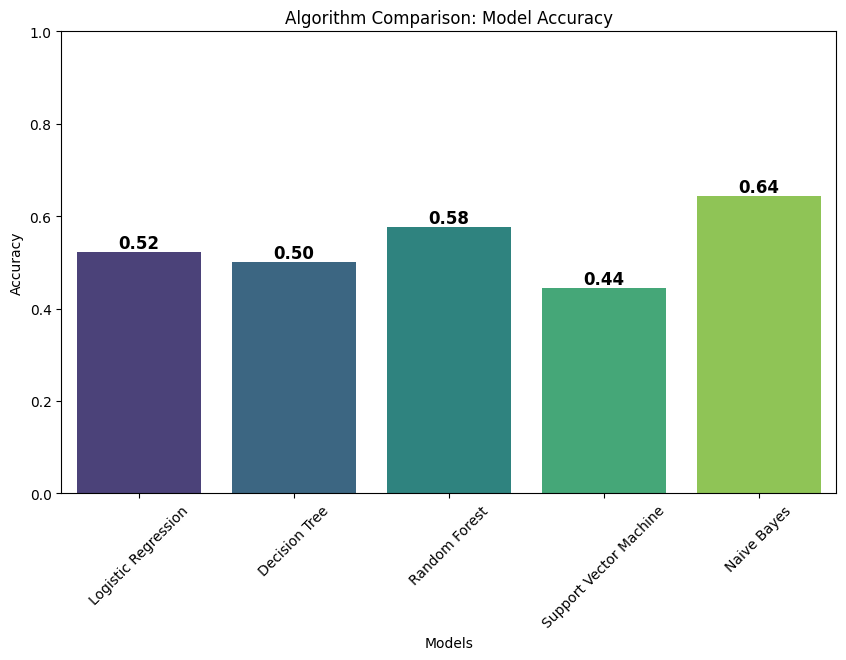

In [37]:

# Bar plot for algorithm comparison (accuracies of models)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=names, y=results, palette='viridis')
plt.title('Algorithm Comparison: Model Accuracy')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

In [39]:
import seaborn as sns
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB())
]

results = []
resultsf1 = []
names = []

for name, model in models:
    model.fit(X_train_smote, y_train_smote)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = model.score(X_test, y_test)  # Compute accuracy

    results.append(accuracy)
    names.append(name)

    f1 = f1_score(y_test, y_pred, average='weighted') # Calculate F1-score

    resultsf1.append(f1)

    print(f"{name}: Accuracy: {accuracy:.3f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy: 0.522
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Abnormal       0.27      0.21      0.24       104
      Normal       0.62      0.69      0.65       193

    accuracy                           0.52       297
   macro avg       0.44      0.45      0.44       297
weighted avg       0.50      0.52      0.51       297


Decision Tree: Accuracy: 0.512
Classification Report for Decision Tree:
              precision    recall  f1-score   support

    Abnormal       0.33      0.38      0.36       104
      Normal       0.64      0.58      0.61       193

    accuracy                           0.51       297
   macro avg       0.48      0.48      0.48       297
weighted avg       0.53      0.51      0.52       297


Random Forest: Accuracy: 0.586
Classification Report for Random Forest:
              precision    recall  f1-score   support

    Abnormal       0.37      0.27      0.31       104
      N

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


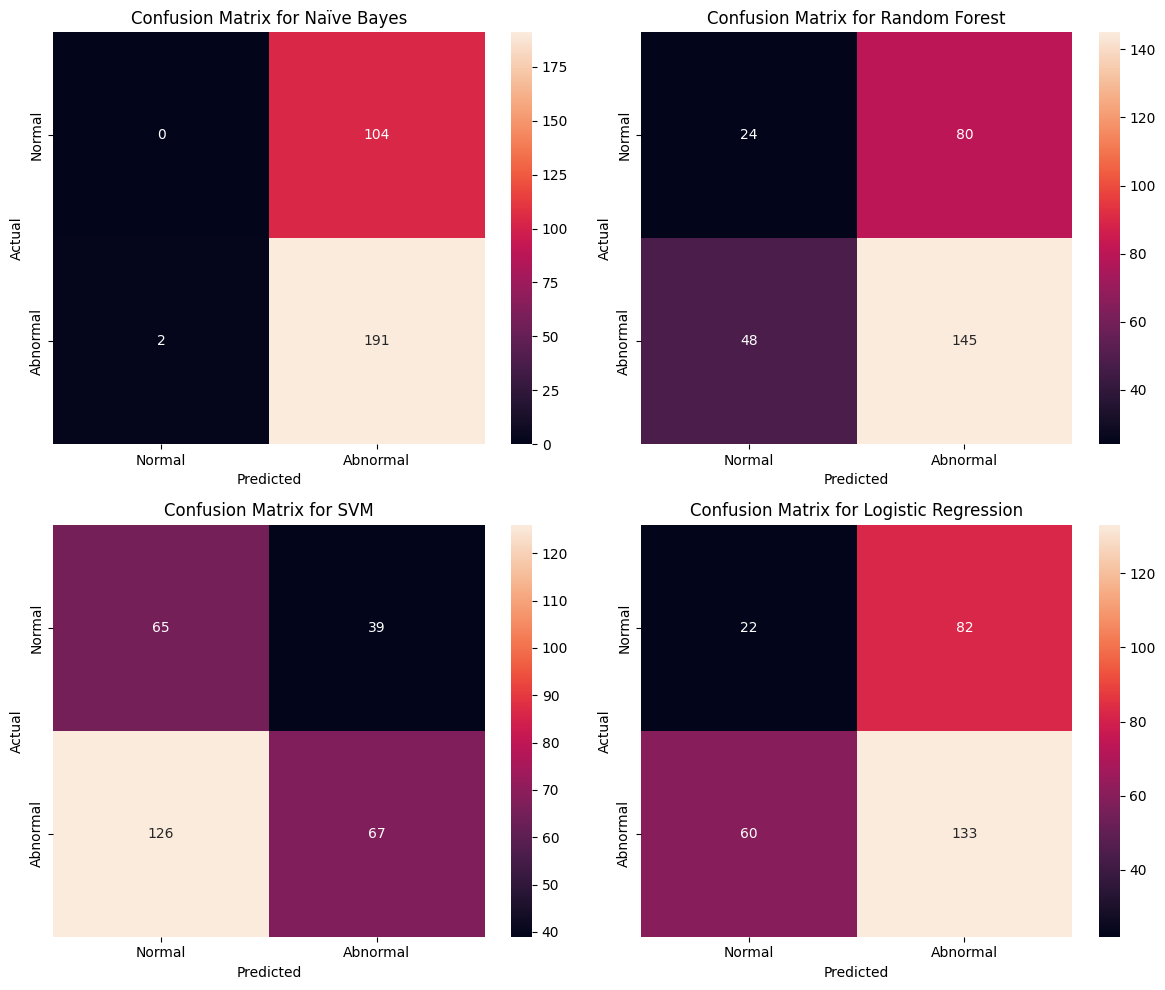

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# Assuming you have trained the models and assigned them to these variables:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_smote, y_train_smote)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_smote, y_train_smote)

svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_smote, y_train_smote)

# Dictionary of models
models = {
    "Naïve Bayes": naive_bayes_model,
    "Random Forest": random_forest_model,
    "SVM": svm_model,
    "Logistic Regression": logistic_regression_model
}

plt.figure(figsize=(12, 10))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)  # Predict using the model
    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix

    plt.subplot(2, 2, i)  # Adjust grid size based on the number of models
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=['Normal', 'Abnormal'],
                yticklabels=['Normal', 'Abnormal'])

    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [41]:
results

[0.5218855218855218,
 0.5117845117845118,
 0.5858585858585859,
 0.4444444444444444,
 0.6430976430976431]

Question 2, Wait Time in Mins

In [42]:
import pandas as pd

In [43]:
import numpy as np

In [44]:
import matplotlib.pyplot as plt

In [45]:
import seaborn as sns

In [46]:
df= pd.read_csv('/content/Hospital_Wait_Time_Dataset.csv')

In [47]:
df

,Patient_ID,Age,Gender,Insurance_Type,Arrival_Mode,Department,Hospital_Capacity_Utilization,Current_Patient_Load,Available_Doctors,Available_Nurses,Day_of_Week,Time_of_Day,Previous_Visit_History,Weather_Condition,Wait_Time_Minutes
0,1,69.0,Male,Uninsured,Walk-in,Emergency,76.716374,65.0,5.0,8.0,Sunday,Morning,Frequent,Rainy,185.0
1,2,32.0,Female,Uninsured,Walk-in,Outpatient,74.828060,54.0,6.0,7.0,Sunday,Night,Frequent,Snowy,296.0
2,3,78.0,Male,Private,Walk-in,Emergency,69.480904,101.0,1.0,8.0,Monday,Morning,First-time,Clear,286.0
3,4,38.0,NaN,Private,Referral,Specialty,64.881759,134.0,5.0,5.0,Monday,Night,Frequent,Snowy,33.0
4,5,41.0,Female,Uninsured,Ambulance,NaN,54.999244,66.0,9.0,8.0,Monday,Evening,First-time,Clear,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,52.0,Female,Uninsured,Ambulance,Emergency,63.296896,40.0,8.0,7.0,Wednesday,Night,Frequent,Rainy,8.0
96,97,82.0,Female,Uninsured,Referral,Specialty,68.017255,24.0,3.0,17.0,Thursday,Evening,Frequent,Rainy,214.0
97,98,64.0,Female,Government,Walk-in,Emergency,62.997493,111.0,5.0,10.0,Thursday,Morning,First-time,Snowy,165.0
98,99,20.0,Male,Government,Ambulance,Outpatient,72.662042,80.0,6.0,5.0,Thursday,Night,First-time,Clear,20.0


In [48]:
df.shape

(100, 15)

In [49]:
df.head()

,Patient_ID,Age,Gender,Insurance_Type,Arrival_Mode,Department,Hospital_Capacity_Utilization,Current_Patient_Load,Available_Doctors,Available_Nurses,Day_of_Week,Time_of_Day,Previous_Visit_History,Weather_Condition,Wait_Time_Minutes
0,1,69.0,Male,Uninsured,Walk-in,Emergency,76.716374,65.0,5.0,8.0,Sunday,Morning,Frequent,Rainy,185.0
1,2,32.0,Female,Uninsured,Walk-in,Outpatient,74.828060,54.0,6.0,7.0,Sunday,Night,Frequent,Snowy,296.0
2,3,78.0,Male,Private,Walk-in,Emergency,69.480904,101.0,1.0,8.0,Monday,Morning,First-time,Clear,286.0
3,4,38.0,NaN,Private,Referral,Specialty,64.881759,134.0,5.0,5.0,Monday,Night,Frequent,Snowy,33.0
4,5,41.0,Female,Uninsured,Ambulance,NaN,54.999244,66.0,9.0,8.0,Monday,Evening,First-time,Clear,153.0


In [50]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Insurance_Type', 'Arrival_Mode',
       'Department', 'Hospital_Capacity_Utilization', 'Current_Patient_Load',
       'Available_Doctors', 'Available_Nurses', 'Day_of_Week', 'Time_of_Day',
       'Previous_Visit_History', 'Weather_Condition', 'Wait_Time_Minutes'],
      dtype='object')

In [51]:
df=df.drop_duplicates(subset=['Patient_ID'])

In [52]:
df.isnull().sum()

,0
Patient_ID,0
Age,3
Gender,2
Insurance_Type,0
Arrival_Mode,1
Department,1
Hospital_Capacity_Utilization,0
Current_Patient_Load,1
Available_Doctors,2
Available_Nurses,1


In [53]:
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered= df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

In [54]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    df = remove_outliers_iqr(df, column)

In [55]:
df=df.dropna(subset=['Wait_Time_Minutes'])

In [56]:
category_columns=df.select_dtypes(include=['object']).columns
for column in category_columns:
  print(df[column].unique())

['Male' 'Female' nan 'male']
['Uninsured' 'Private' 'Government']
['Walk-in' 'Referral' 'Ambulance' nan]
['Emergency' 'Outpatient' 'Specialty' nan 'out']
['Sunday' 'Monday' 'Saturday' 'Friday' 'Wednesday' 'Tuesday' 'Thursday'
 'Tue']
['Morning' 'Night' 'Evening' 'Afternoon' nan]
['Frequent' 'First-time' nan]
['Rainy' 'Snowy' 'Clear' nan]


In [57]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Gender']=df['Gender'].replace({'F':'Female'})

<ipython-input-57-f5b879e5126d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)


In [58]:
df['Department'].fillna(df['Department'].mode()[0],inplace=True)
df['Department']=df['Department'].replace({'emer':'Emergency','out':'Outpatient'})

<ipython-input-58-f02186146cdb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Department'].fillna(df['Department'].mode()[0],inplace=True)


In [59]:
df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0],inplace=True)
df['Day_of_Week']=df['Day_of_Week'].replace({'Tue':'Tuesday'})

<ipython-input-59-e78530659aca>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0],inplace=True)


In [60]:
columns_to_fill=['Age','Hospital_Capacity_Utilization','Current_Patient_Load',
       'Available_Doctors', 'Available_Nurses']
for column in columns_to_fill:
    df[column]=df[column].fillna(df[column].mean())

In [61]:
columns_to_fill = ['Gender', 'Insurance_Type', 'Arrival_Mode',
                   'Department', 'Day_of_Week', 'Time_of_Day',
                   'Previous_Visit_History', 'Weather_Condition']
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mode()[0])

In [62]:
df= pd.get_dummies(df,columns=['Gender', 'Insurance_Type', 'Arrival_Mode',
       'Department','Time_of_Day','Previous_Visit_History', 'Weather_Condition'])

In [63]:
df=df.drop(columns=['Patient_ID','Day_of_Week'])

In [64]:
min_max_values={}
cols=['Age','Hospital_Capacity_Utilization', 'Current_Patient_Load',
       'Available_Doctors', 'Available_Nurses']
for i in cols:
    min_val=df[i].min()
    max_val=df[i].max()
    min_max_values[i]=(min_val,max_val)
    df[i]=(df[i]-min_val)/(max_val-min_val)

In [65]:
min_max_values

{'Age': (18.0, 82.0),
 'Hospital_Capacity_Utilization': (51.61579756, 99.7965621),
 'Current_Patient_Load': (20.0, 148.0),
 'Available_Doctors': (1.0, 9.0),
 'Available_Nurses': (5.0, 19.0)}

In [66]:
import json
with open('min_max_values.json','w') as json_file:
    json.dump(min_max_values,json_file)

In [67]:
df.head()

,Age,Hospital_Capacity_Utilization,Current_Patient_Load,Available_Doctors,Available_Nurses,Wait_Time_Minutes,Gender_Female,Gender_Male,Gender_male,Insurance_Type_Government,...,Department_Specialty,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Previous_Visit_History_First-time,Previous_Visit_History_Frequent,Weather_Condition_Clear,Weather_Condition_Rainy,Weather_Condition_Snowy
0,0.796875,0.520967,0.351562,0.500,0.214286,185.0,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
1,0.218750,0.481774,0.265625,0.625,0.142857,296.0,True,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,0.937500,0.370793,0.632812,0.000,0.214286,286.0,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
3,0.312500,0.275337,0.890625,0.500,0.000000,33.0,True,False,False,False,...,True,False,False,False,True,False,True,False,False,True
4,0.359375,0.070224,0.359375,1.000,0.214286,153.0,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False


In [68]:
df.corr()

,Age,Hospital_Capacity_Utilization,Current_Patient_Load,Available_Doctors,Available_Nurses,Wait_Time_Minutes,Gender_Female,Gender_Male,Gender_male,Insurance_Type_Government,...,Department_Specialty,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Previous_Visit_History_First-time,Previous_Visit_History_Frequent,Weather_Condition_Clear,Weather_Condition_Rainy,Weather_Condition_Snowy
Age,1.000000,0.057601,0.044114,-0.283075,-0.021904,0.225601,0.059176,-0.024541,-0.167061,0.045739,...,0.136767,0.244810,-0.090686,-0.032772,-0.111482,0.097471,-0.097471,0.066605,-0.082185,2.356095e-02
Hospital_Capacity_Utilization,0.057601,1.000000,-0.003745,0.031854,0.189482,0.015309,-0.006548,-0.019533,0.125668,-0.077773,...,0.086585,0.121185,-0.028958,0.074570,-0.184018,0.155976,-0.155976,0.038079,-0.040484,6.006155e-03
Current_Patient_Load,0.044114,-0.003745,1.000000,0.042486,0.017969,0.024146,0.031600,-0.012899,-0.090200,0.064394,...,-0.145762,0.092786,0.012802,-0.069303,-0.027049,0.140534,-0.140534,0.050950,-0.001087,-5.289317e-02
Available_Doctors,-0.283075,0.031854,0.042486,1.000000,0.047985,0.007704,-0.128751,0.095369,0.161264,-0.107925,...,-0.027297,-0.081319,0.112122,-0.071660,0.043574,-0.238040,0.238040,-0.039757,0.030192,7.591240e-03
Available_Nurses,-0.021904,0.189482,0.017969,0.047985,1.000000,-0.052151,0.137939,-0.173106,0.168946,-0.117218,...,0.201031,0.174807,-0.160746,0.045172,-0.053092,-0.212332,0.212332,-0.019904,0.055384,-4.242318e-02
Wait_Time_Minutes,0.225601,0.015309,0.024146,0.007704,-0.052151,1.000000,0.112247,-0.102463,-0.047521,0.037711,...,0.002894,0.031012,-0.005517,0.155851,-0.215823,0.022422,-0.022422,0.035645,0.036278,-7.951993e-02
Gender_Female,0.059176,-0.006548,0.031600,-0.128751,0.137939,0.112247,1.000000,-0.978472,-0.107133,0.170414,...,0.131228,0.015764,0.011157,0.053504,-0.094389,0.022711,-0.022711,-0.061639,-0.041370,1.129865e-01
Gender_Male,-0.024541,-0.019533,-0.012899,0.095369,-0.173106,-0.102463,-0.978472,1.000000,-0.100366,-0.201816,...,-0.165990,-0.004674,0.002127,-0.084065,0.104816,-0.001894,0.001894,0.076076,0.017131,-1.005038e-01
Gender_male,-0.167061,0.125668,-0.090200,0.161264,0.168946,-0.047521,-0.107133,-0.100366,1.000000,0.150700,...,0.167019,-0.053480,-0.064034,0.147049,-0.049908,-0.100366,0.100366,-0.069338,0.116916,-6.052275e-02
Insurance_Type_Government,0.045739,-0.077773,0.064394,-0.107925,-0.117218,0.037711,0.170414,-0.201816,0.150700,1.000000,...,0.078363,-0.125764,-0.112176,0.190889,0.027273,0.076690,-0.076690,-0.208141,0.122711,8.032193e-02


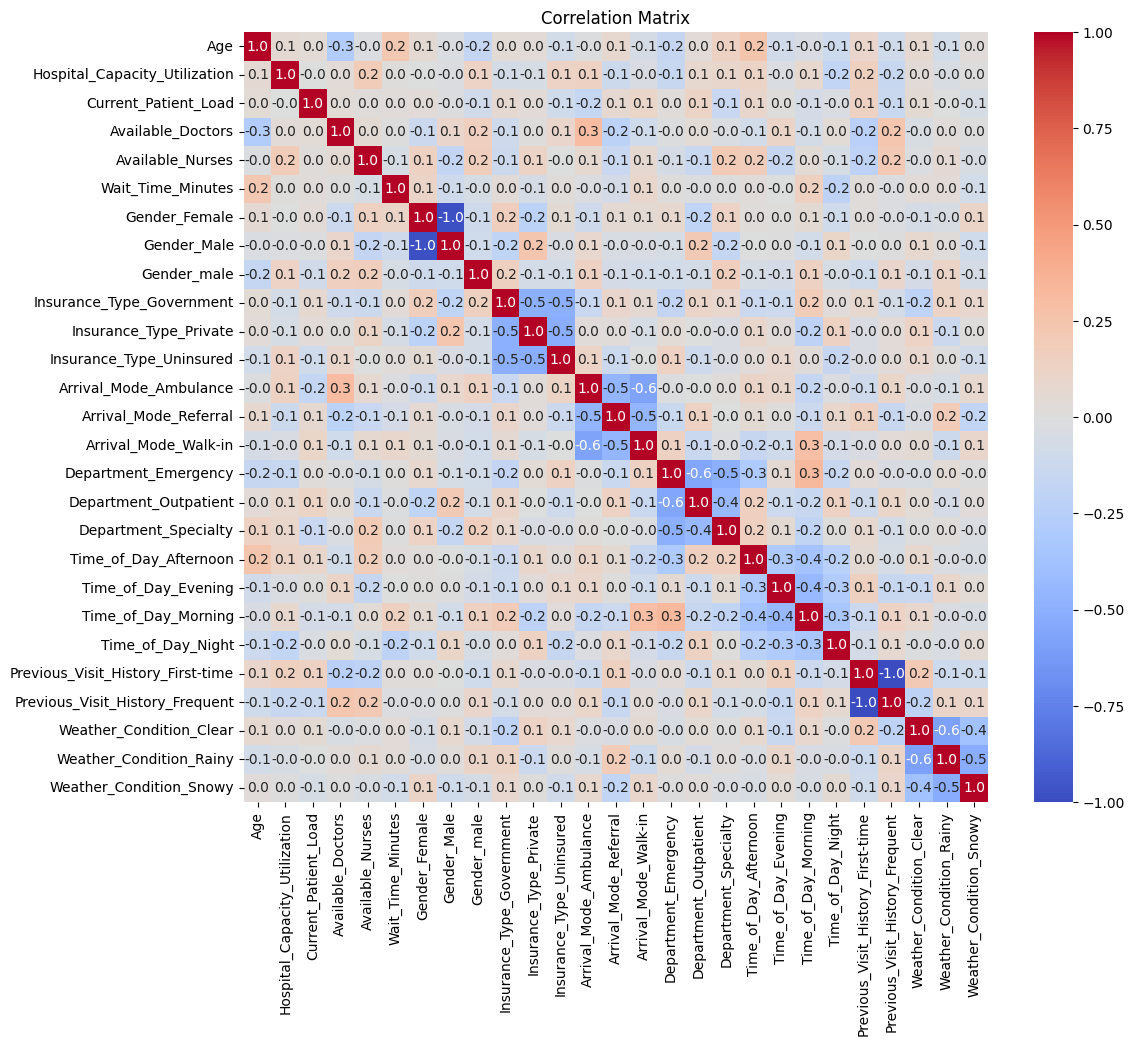

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
Correlation_matrix = df.corr()
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm',fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

In [70]:
x=df.drop(columns=['Wait_Time_Minutes','Department_Emergency','Arrival_Mode_Ambulance'],axis=1)
y=df['Wait_Time_Minutes']

In [71]:
y = df['Wait_Time_Minutes']
y.value_counts()

,count
Wait_Time_Minutes,
112.0,3
21.0,2
102.0,2
20.0,2
135.0,2
...,...
61.0,1
296.0,1
84.0,1


In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [99]:
import statsmodels.api as sm
import pandas as pd

def backward_elimination(x, y, significance_level=0.05):
    x = sm.add_constant(x)  # Adding a constant
    num_vars = len(x.columns)
    for i in range(0, num_vars):
        regressor_OLS = sm.OLS(y, x.astype(float)).fit() # Convert x to float
        # Removed redundant astype(float) as max() already returns a float
        max_p_value = max(regressor_OLS.pvalues)
        if max_p_value > significance_level:
            for j in range(0, num_vars - i):
                # Removed redundant astype(float) as p-values are likely floats
                if regressor_OLS.pvalues[j] == max_p_value:
                    x = x.drop(x.columns[j], axis=1)
                    break
        else:
            break
    regressor_OLS = sm.OLS(y, x.astype(float)).fit() # Convert x to float
    # Get the selected features (excluding the constant 'const')
    selected_features = regressor_OLS.model.exog_names[1:]

    return x[selected_features] # Only return the selected features


# Apply backward elimination
x_train_new = backward_elimination(x_train, y_train)

# Train the model with the selected features
reg_new = LinearRegression()
reg_new.fit(x_train_new, y_train)

# Select the same columns from x_test
x_test_new = x_test[x_train_new.columns]
y_pred_new = reg_new.predict(x_test_new) # Predict on the same features


# Evaluate the model (add evaluation metrics here)

<ipython-input-99-0035356a9644>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if regressor_OLS.pvalues[j] == max_p_value:
<ipython-input-99-0035356a9644>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if regressor_OLS.pvalues[j] == max_p_value:
<ipython-input-99-0035356a9644>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if regressor_OLS.pvalues[j] == max_p_value:
<ipython-input-99-0035356a9644>:14: FutureWarning: Series.

In [101]:
from sklearn.metrics import r2_score, mean_squared_error
import math

# ... (Your existing code) ...

# Calculate R-squared
r2 = r2_score(y_test, y_pred_new)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, y_pred_new))
print(f"RMSE: {rmse}")

R-squared: -0.591473876260906
RMSE: 123.03089293315814


In [102]:
# prompt: forward selection linear regression

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def forward_selection(X_train, y_train, X_test, y_test):
    remaining_features = list(X_train.columns)
    selected_features = []
    best_model = None
    best_r2 = -np.inf

    while remaining_features:
        best_feature_to_add = None
        best_r2_with_added_feature = -np.inf

        for feature in remaining_features:
            current_features = selected_features + [feature]
            model = LinearRegression()
            model.fit(X_train[current_features], y_train)
            y_pred = model.predict(X_test[current_features])
            r2 = r2_score(y_test, y_pred)

            if r2 > best_r2_with_added_feature:
                best_r2_with_added_feature = r2
                best_feature_to_add = feature

        if best_r2_with_added_feature > best_r2:
            selected_features.append(best_feature_to_add)
            remaining_features.remove(best_feature_to_add)
            best_r2 = best_r2_with_added_feature
            best_model = LinearRegression()
            best_model.fit(X_train[selected_features], y_train)
        else:
            break # No improvement, stop adding features
    return best_model, selected_features

# Example usage (assuming x_train, x_test, y_train, y_test are defined from your previous code)
best_model, selected_features = forward_selection(x_train, y_train, x_test, y_test)

print("Selected features:", selected_features)

# Evaluate the best model
y_pred = best_model.predict(x_test[selected_features])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared:",r2)

Selected features: ['Time_of_Day_Night', 'Gender_Female', 'Time_of_Day_Morning', 'Available_Nurses', 'Arrival_Mode_Walk-in', 'Weather_Condition_Clear']
Mean Squared Error: 8472.206359261267
R-squared: 0.10922568169859803


In [74]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 140.24429940784856
R2 Score: -1.0679574408269414


In [75]:

pd.DataFrame(x.columns,reg.coef_)

,0
99.435072,Age
14.751365,Hospital_Capacity_Utilization
-61.262043,Current_Patient_Load
18.662847,Available_Doctors
-21.836374,Available_Nurses
26.628816,Gender_Female
5.690254,Gender_Male
-32.319070,Gender_male
-0.989474,Insurance_Type_Government
18.649427,Insurance_Type_Private


Question.03, Time Analysis

In [76]:
import pandas as pd

In [77]:
import numpy as np

In [78]:
import matplotlib.pyplot as plt


In [79]:
import seaborn as sns

In [80]:
df=pd.read_csv('/content/Hospital_Finance.csv')

In [81]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 41.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [82]:
from prophet import Prophet

In [83]:
df.tail(150)

,Hospital ID,Date,Revenue,Expenses
0,H1,01-02-2020,9398598.0,7530282.0
1,H1,02-02-2020,6436361.0,7810390.0
2,H1,03-02-2020,8966659.0,7167199.0
3,H1,04-02-2020,5207746.0,6334585.0
4,H1,05-02-2020,6184203.0,7327760.0
5,H1,06-02-2020,8539620.0,6805552.0
6,H1,07-02-2020,9990998.0,5989310.0
7,H1,08-02-2020,NaN,5574714.0
8,H1,09-02-2020,8215079.0,4300685.0
9,H1,10-02-2020,6248045.0,8757464.0


In [84]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [85]:
df.head()

,Hospital ID,Date,Revenue,Expenses
0,H1,2020-02-01,9398598.0,7530282.0
1,H1,2020-02-02,6436361.0,7810390.0
2,H1,2020-02-03,8966659.0,7167199.0
3,H1,2020-02-04,5207746.0,6334585.0
4,H1,2020-02-05,6184203.0,7327760.0


<ipython-input-86-b6ba33bbcbc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data_edit.rename(columns={'Date':'ds','Revenue':'y'},inplace=True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwr19t82j/_68m6lbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwr19t82j/wpfqg3k8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99321', 'data', 'file=/tmp/tmpwr19t82j/_68m6lbt.json', 'init=/tmp/tmpwr19t82j/wpfqg3k8.json', 'output', 'file=/tmp/tmpwr19t82j/prophet

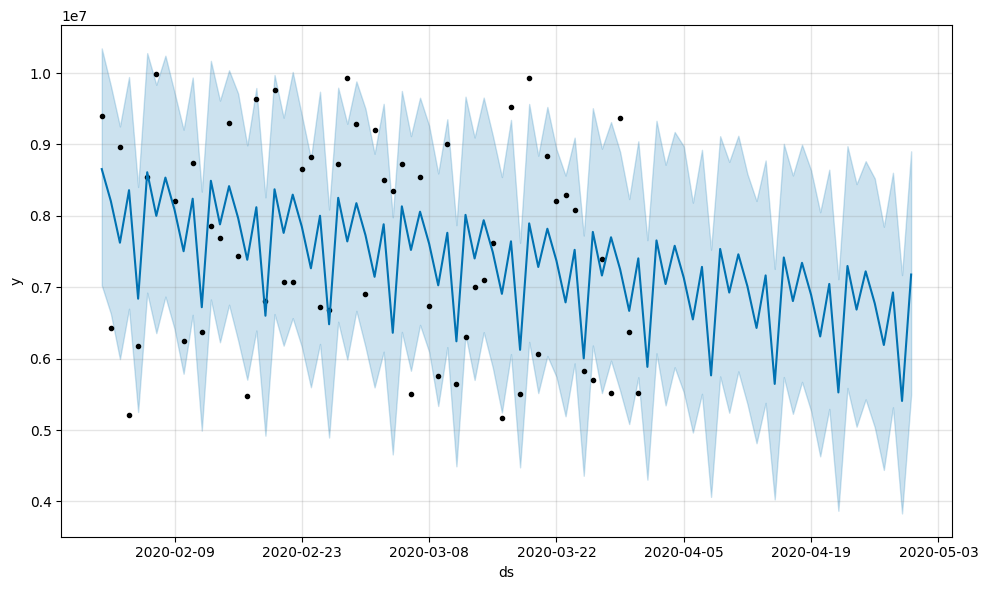

In [86]:
ts_data_edit = df[['Date','Revenue']]
ts_data_edit.rename(columns={'Date':'ds','Revenue':'y'},inplace=True)
model=Prophet()
model.fit(ts_data_edit)

#make future prediction
future=model.make_future_dataframe(periods=30)
forecast = model.predict(future)

#visualize the forecast
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
fig = model.plot(forecast)

<ipython-input-87-f37fa5f4a6a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data_edit.rename(columns={'Date':'ds',i:'y'},inplace=True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwr19t82j/vezwll2y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwr19t82j/vg_iq1d1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37744', 'data', 'file=/tmp/tmpwr19t82j/vezwll2y.json', 'init=/tmp/tmpwr19t82j/vg_iq1d1.json', 'output', 'file=/tmp/tmpwr19t82j/prophet_modelnv

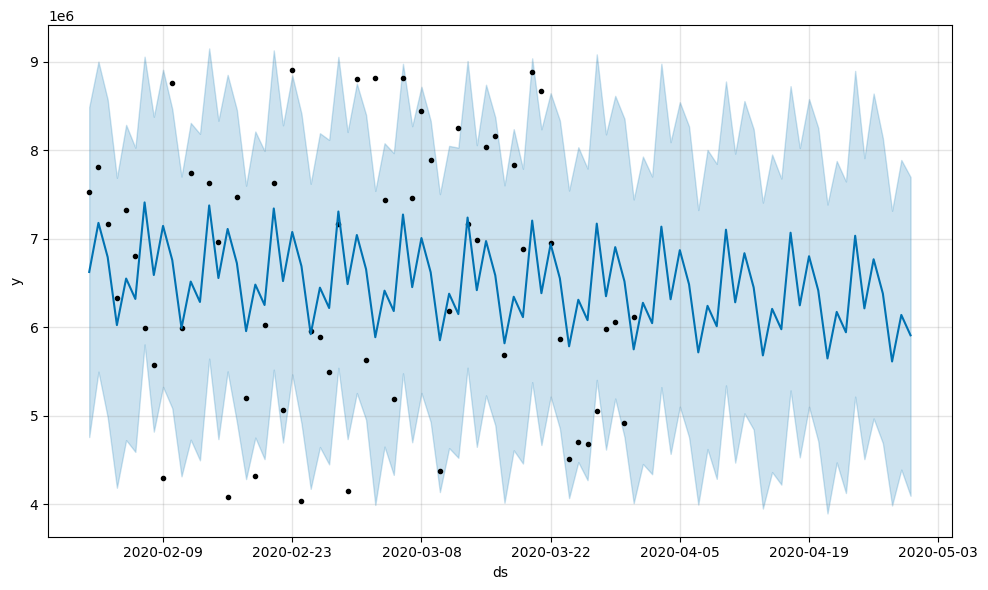

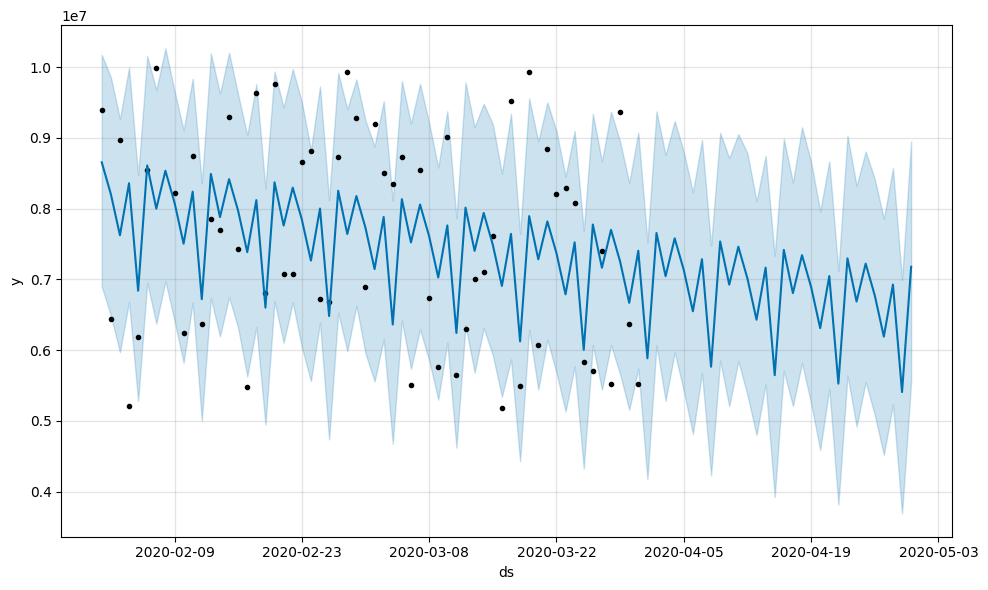

In [87]:
cols = ["Expenses","Revenue"]
listResult = []
for i in cols:
  ts_data_edit = df[['Date',i]]
  ts_data_edit.rename(columns={'Date':'ds',i:'y'},inplace=True)
  model=Prophet()
  model.fit(ts_data_edit)

  #make future prediction
  future=model.make_future_dataframe(periods=30)
  forecast = model.predict(future)
  forecast_filter = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(30)
  forecast_filter["Variable"] = i
  listResult.append(forecast_filter)
  #visualize the forecast
  from prophet.plot import add_changepoints_to_plot
  import matplotlib.pyplot as plt
  fig = model.plot(forecast)

In [88]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [89]:
pd.concat(listResult).to_csv("forecast.csv")